In [1]:
#모듈 호출
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf

#로그
print("✨모듈 호출이 완료되었습니다.")

#동일한 결과를 얻기 위해 케라스 랜덤 시드를 사용하고, 텐서플로 연산을 결정적으로 만들기
tf.keras.utils.set_random_seed(42)
print("⚙️케라스 랜덤 시드를 사용하고, 텐서플로 연산을 결정적으로 만들었습니다.")

✨모듈 호출이 완료되었습니다.
⚙️케라스 랜덤 시드를 사용하고, 텐서플로 연산을 결정적으로 만들었습니다.


In [2]:
#케라스 합성곱 층
keras.layers.Conv2D(10, kernel_size = (3,3), activation='relu')
#케라스 패딩 설정
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')
#케라스 스트라이드 설정
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)
#케라스의 풀링 층
keras.layers.MaxPooling2D(2)
keras.layers.MaxPooling2D(2, strides=2, padding='valid')

<MaxPooling2D name=max_pooling2d_1, built=True>

In [3]:
#패션 MNIST데이터 불러오기
(train_input, train_target), (test_input, test_target)= \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [4]:
#첫 번째 합성공 신경망
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

model.add(keras.layers.MaxPooling2D(2))

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
#두 번째 합성공 층
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))

model.add(keras.layers.MaxPooling2D(2))

In [6]:
#완전 연결 층
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
#모델 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

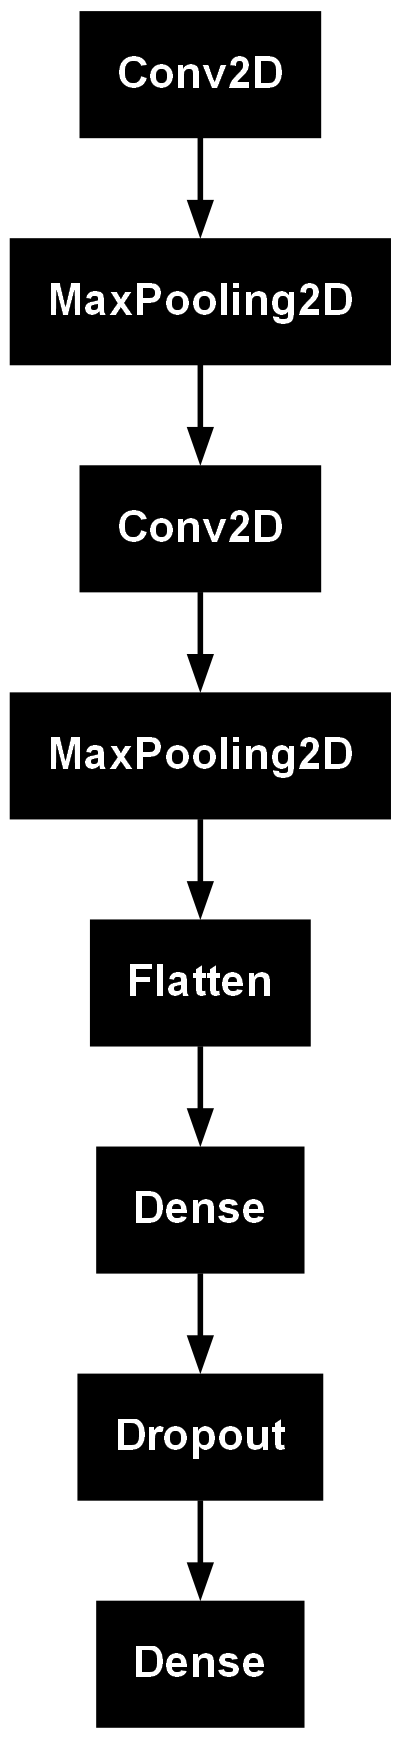

In [8]:
keras.utils.plot_model(model)

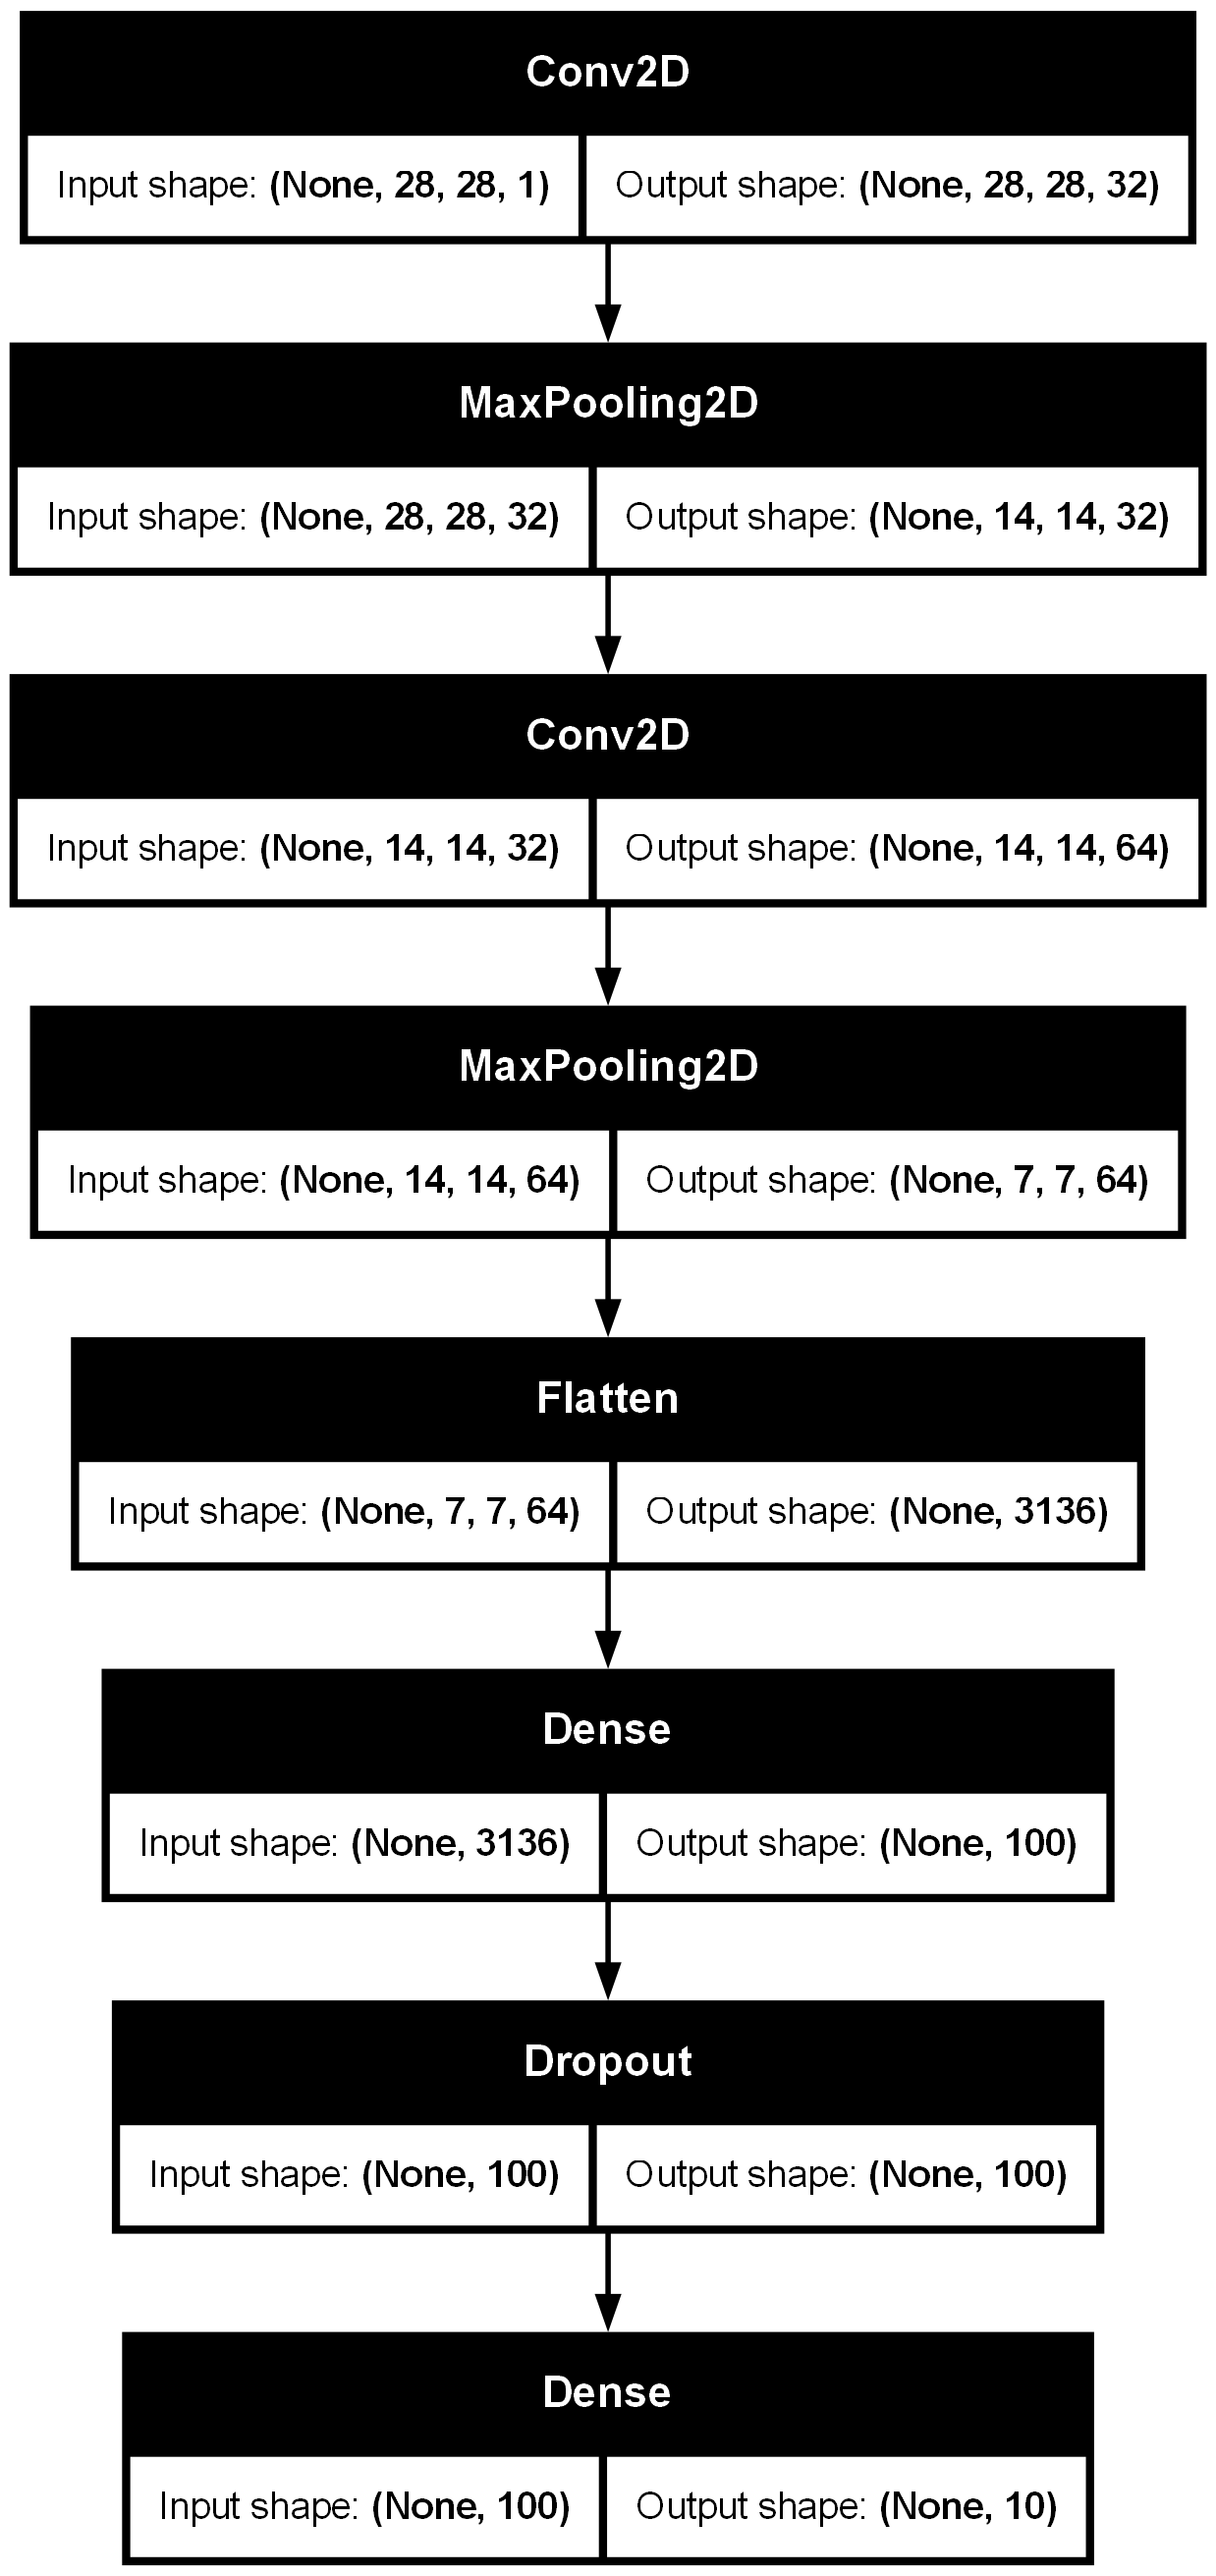

In [9]:
keras.utils.plot_model(model, show_shapes=True)

In [10]:
#컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#콜백, 조기종료
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

#훈련
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
1494/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7354 - loss: 0.7319

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7357 - loss: 0.7310 - val_accuracy: 0.8809 - val_loss: 0.3260
Epoch 2/20
1496/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8671 - loss: 0.3725

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8671 - loss: 0.3725 - val_accuracy: 0.8946 - val_loss: 0.2808
Epoch 3/20
1495/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8867 - loss: 0.3131

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8867 - loss: 0.3130 - val_accuracy: 0.9024 - val_loss: 0.2611
Epoch 4/20
1494/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8965 - loss: 0.2814

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8965 - loss: 0.2814 - val_accuracy: 0.9082 - val_loss: 0.2450
Epoch 5/20
1494/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9070 - loss: 0.2520

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9070 - loss: 0.2520 - val_accuracy: 0.9137 - val_loss: 0.2307
Epoch 6/20
1496/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9131 - loss: 0.2292

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9132 - loss: 0.2292 - val_accuracy: 0.9141 - val_loss: 0.2270
Epoch 7/20
1495/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9205 - loss: 0.2102

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9205 - loss: 0.2101 - val_accuracy: 0.9189 - val_loss: 0.2272
Epoch 8/20
1496/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9281 - loss: 0.1944

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9281 - loss: 0.1943 - val_accuracy: 0.9176 - val_loss: 0.2288


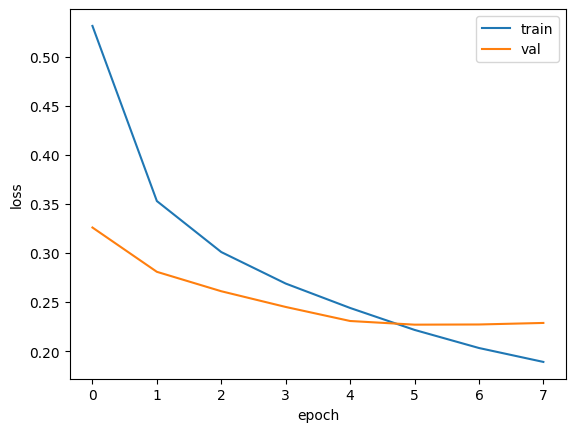

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [12]:
#평가
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9156 - loss: 0.2209


[0.22699813544750214, 0.9140833616256714]

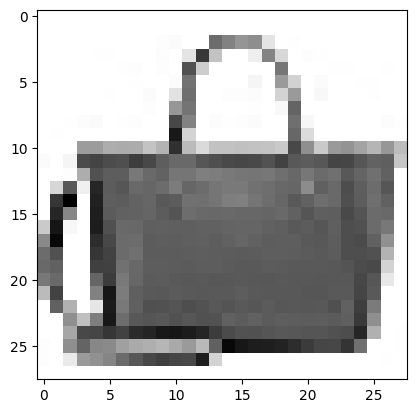

In [13]:
#에측할 이미지 보여주기
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [14]:
#예측
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[[1.1307952e-15 4.0011999e-20 5.4706036e-18 5.7330591e-17 8.5187387e-17
  6.9903426e-17 1.1658675e-15 3.1869181e-14 1.0000000e+00 8.7971684e-17]]


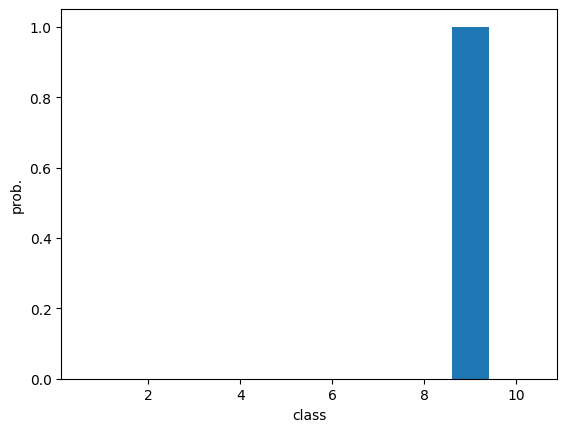

In [15]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [16]:
#이미지의 클래스들
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [17]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [18]:
test_scaled = test_input.reshape(-1, 28, 28, 1)/255.0

In [19]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9140 - loss: 0.2526


[0.24558593332767487, 0.9142000079154968]

In [20]:
#층의 가중치 분포
model.layers

[<Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [21]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [22]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.02446674 0.23980373


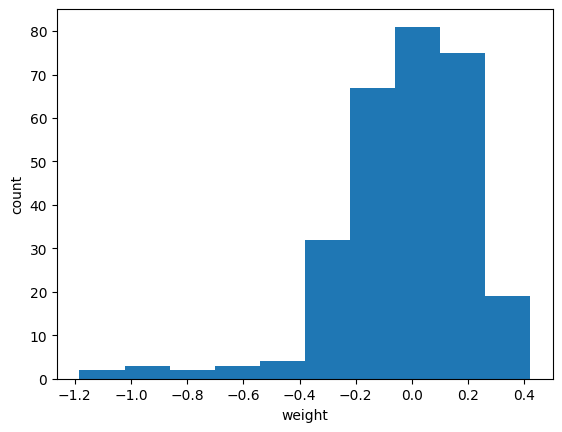

In [23]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

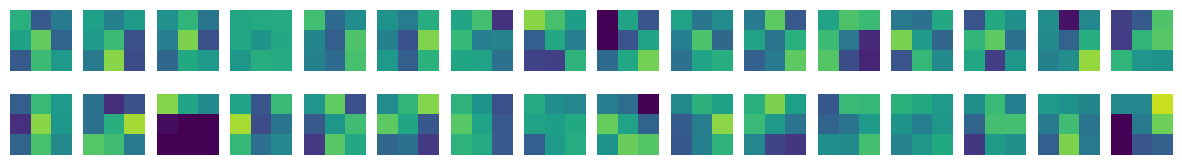

In [33]:
#층의 가중치 시각화
fig, axs = plt.subplots(2, 16, figsize=(15, 2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [25]:
#아무것도 학습되지 않은 모델 시각화
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [26]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape, no_training_conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [27]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0016975602 0.08003447


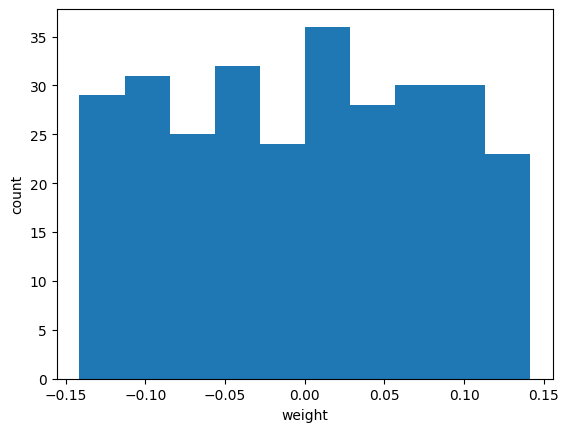

In [28]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

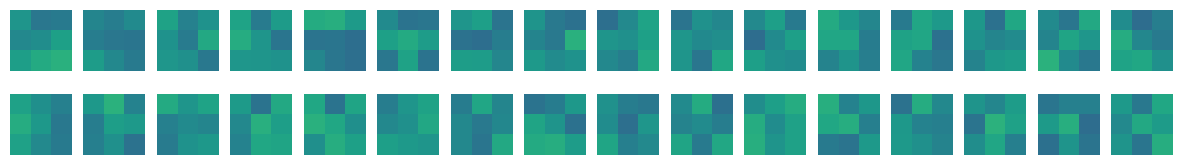

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [ ]:
#함수형 API - 1번째 특성 맵 시각화
conv_acti = keras.Model(model.inputs, model.layers[0].output)

In [37]:
#데이터 다시 로드
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

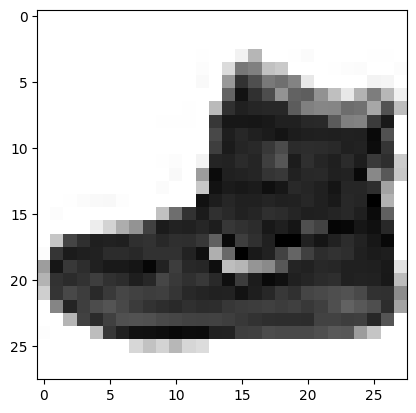

In [38]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [48]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0

feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [49]:
print(feature_maps.shape)

(1, 28, 28, 32)


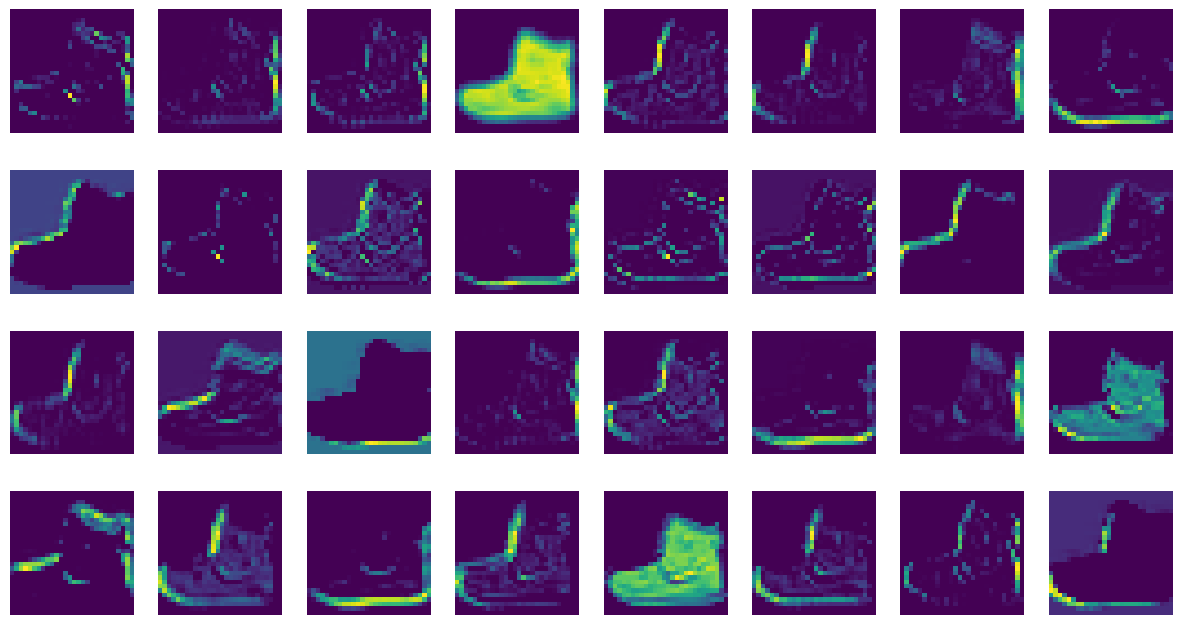

In [55]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')

plt.show()

In [56]:
#함수형 API - 1번째 특성 맵 시각화
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [58]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [59]:
print(feature_maps.shape)

(1, 14, 14, 64)


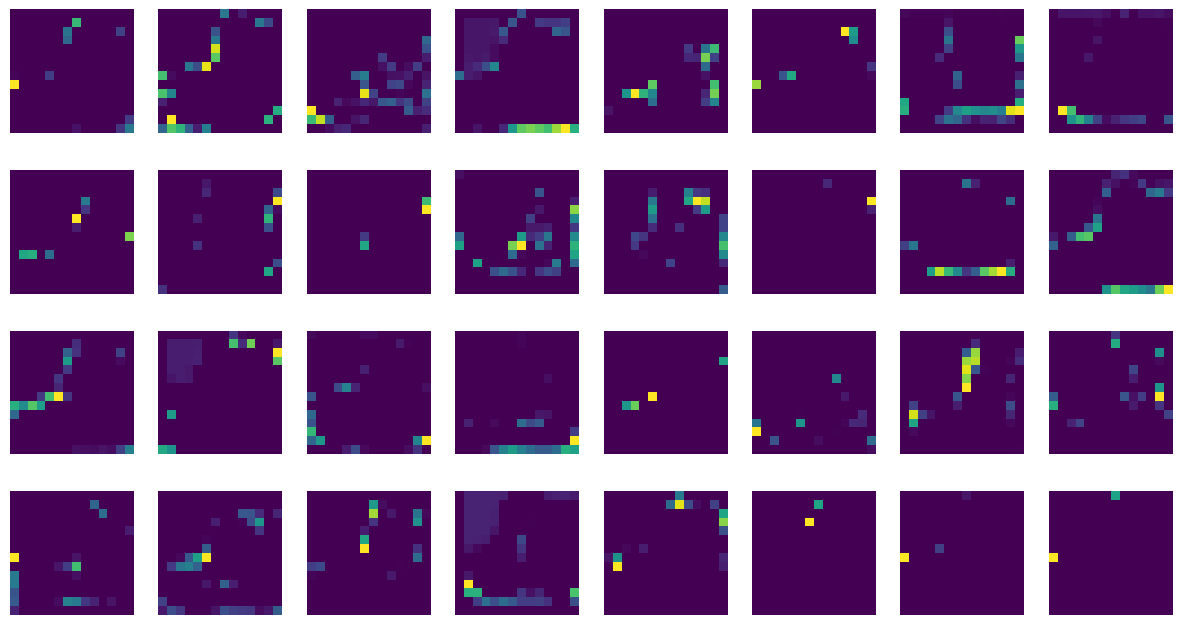

In [60]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')

plt.show()